In [10]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import numpy as np
import joblib


In [11]:
# Dummy dataset penerima manfaat
data = {
    'nama_kepala_keluarga': ['Pak Budi', 'Bu Siti', 'Pak Rahmat', 'Bu Ani', 'Pak Hasan'],  # Nama Kepala Keluarga
    'lokasi_penerima': [1, 2, 3, 1, 3],  # Representasi lokasi penerima (1: Dekat, 2: Sedang, 3: Jauh dari donatur)
    'jumlah_kebutuhan': [5, 10, 15, 5, 20],  # Jumlah porsi makanan yang dibutuhkan
    'kondisi_ekonomi': [1, 2, 3, 1, 1],  # 1: Rendah, 2: Menengah, 3: Tinggi
    'ketersediaan': [1, 0, 1, 1, 0],  # 1: Siap menerima, 0: Tidak siap
    'prioritas': [1, 0, 1, 1, 0]  # Target (1: Layak menerima, 0: Tidak layak menerima)
}

# Konversi ke DataFrame
df = pd.DataFrame(data)

In [12]:
#Proses Data dan Pembagian Dataset

# Pisahkan fitur dan label
X = df[['lokasi_penerima', 'jumlah_kebutuhan', 'kondisi_ekonomi', 'ketersediaan']]  # Fitur
y = df['prioritas']  # Target

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#Melatih Model Decision Tree

# Buat model Decision Tree
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

# Latih model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [14]:
# Simpan model untuk digunakan dalam aplikasi
joblib.dump(model, 'decision_tree.pkl')

['decision_tree.pkl']

In [15]:
# Menampilkan aturan dari Decision Tree
tree_rules = export_text(model, feature_names=list(X.columns))
print("Aturan Decision Tree:\n")
print(tree_rules)

Aturan Decision Tree:

|--- ketersediaan <= 0.50
|   |--- class: 0
|--- ketersediaan >  0.50
|   |--- class: 1



[Text(0.5, 0.75, 'ketersediaan <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Layak'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Tidak Layak'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Layak'),
 Text(0.625, 0.5, '  False')]

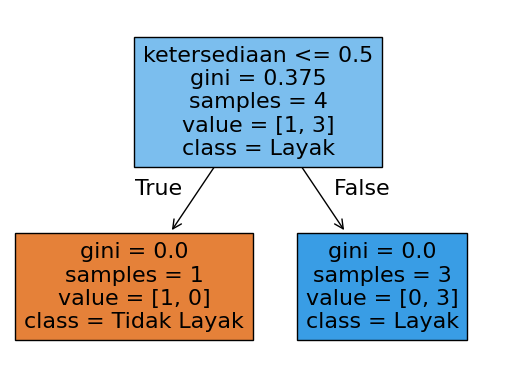

In [16]:
# Visualisasi Decision Tree (opsional)
tree.plot_tree(model, feature_names=X.columns, class_names=['Tidak Layak', 'Layak'], filled=True)

In [17]:
# Prediksi dan Evaluasi Model

# Prediksi data test
y_pred = model.predict(X_test)

# Evaluasi akurasi
from sklearn.metrics import accuracy_score, classification_report
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi Model: 1.0
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [22]:
# Simulasi Penggunaan Model
# Fungsi rekomendasi berdasarkan input penerima
def rekomendasi(lokasi_penerima, jumlah_porsi, kondisi_ekonomi, ketersediaan):
    # Data donasi sebagai input
    input_data = pd.DataFrame({
    'lokasi_penerima': [3],  # Lokasi penerima 
    'jumlah_kebutuhan': [8],  # Jumlah kebutuhan 8 porsi
    'kondisi_ekonomi': [2],  # Kondisi ekonomi rendah
    'ketersediaan': [1]  # Siap menerima
})
    
    # Load model yang telah disimpan
    model = joblib.load('decision_tree.pkl')
    
    # Prediksi hasil
    hasil = model.predict(input_data)
    
    # Interpretasi hasil
    if hasil[0] == 1:
        return "Penerima cocok untuk donasi ini."
    else:
        return "Penerima tidak cocok untuk donasi ini."

# Contoh simulasi
print(rekomendasi(lokasi_penerima=1, jumlah_porsi=10, kondisi_ekonomi=1, ketersediaan=1))

Penerima cocok untuk donasi ini.
